<a href="https://colab.research.google.com/github/jrakhshanda55/Ausaf_ML/blob/main/Athar_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from IPython.display import Image

# Supervised Machine Learning
Supervised machine learning operates as a framework within the broader field of machine learning. In this paradigm, algorithms are trained using input objects and corresponding labeled output values from a designated training dataset. The primary aim of supervised learning is to establish a mapping from inputs to outputs, thereby empowering the algorithm (or machine learning model) to make predictions or decisions upon new, previously unseen data.

Machine learning can be broadly categorized intot two main types based on the nature of the output varoable: regression, which deals with predicting numerical values, and classification, which focuses on categorizing data into distinct groups.

# Classification
In supervised learning, a common task is the classification problem. In this scenario, the learner aims to understand and mimic the behavior of a function that assigns a vector to specific classes. This understanding is achieved by examining multiple examples of input-output pairs related to the function. The approach involves inductive machine learning, which means creating a set of rules or a classifier by learning from instances in a training set. Essentially, the goal is to generalize this learned knowledge to make predictions about new instances [Kotsiantis et al. (2007)](https://www.researchgate.net/profile/J-E-T-Akinsola/publication/318338750_Supervised_Machine_Learning_Algorithms_Classification_and_Comparison/links/596481dd0f7e9b819497e265/Supervised-Machine-Learning-Algorithms-Classification-and-Comparison.pdf).

A fundamental example of classification lies in the field of image recognition, where a model is trained to differentiate between distinct objects or entities within an image. For instance, a convolutional neural network (CNN) can be employed to classify images of animals, assigning each image to its respective class (e.g., cat, dog, bird).

Moreover, classification finds application in email filtering for spam detection, wherein machine learning models are trained to discern between legitimate and spam emails based on features such as content, sender information, and email structure. This is crucial for enhancing the efficiency of email communication systems.

## Machine Learning Algorithms for Classification

In our report we will perform two different classification task using conventional machine learning algorithms.

### Metrics for Performance Evaluation
We will discuss some commonly used perfomance evaluation metrics to measure the goodness of classification models as follows:

- **Accuracy**

  - Formula: $\frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$
  - Measures the overall correctness of the model.
- **Confusion Matrix:** A table that summarizes the performance of a classification algorithm. It includes the following values:
  - True Positives (TP): It refers to the number of predictions where the classifier correctly predicts the positive class as positive.
  - True Negative (TN): It refers to the number of predictions where the classifier correctly predicts the negative class as negative.
  - False Positive (FP): It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive.
  - False Negative (FN): It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

  The following figure shows the confusion matrix of a binary classification problem where we have two disfferent classes in target variables.


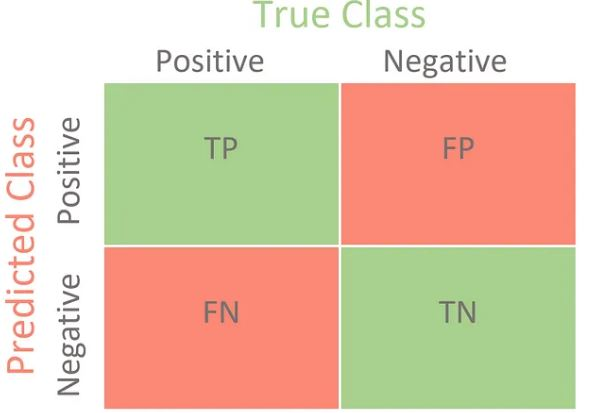

In [64]:
Image(filename='/content/conf_mat.JPG',width=300,height=200)

- **Precision**
  - Formula: $\frac{\text{TP}}{\text{TP}+\text{FP}}$
  - Measures the accuracy of positive predictions. It reflects the classifier's capability to avoid misclassifying a negative sample as positive.
- **Recall (Sensitivity):**
  - Formula: $\frac{\text{TP}}{\text{TP}+\text{FN}}$
  -
Measures the ability of the classifier to capture all the positive instances.
- **F1 Score:**

  - Formula: $\frac{2 \ *\text{ Precision } * \text{ Recall}}{\text{Precision }+\text{ Recall}}$
  - The harmonic mean of precision and recall. It balances trade-off between precision and recall. It is particularly valuable when there is an imbalanced class distribution or when both false positives and false negatives are critical considerations in the evaluation of a model's performance.

## Classification of Iris dataset
The Iris dataset is a well-known benchmark in the realm of machine learning, serving as a foundation for understanding classification algorithms. It comprises 150 iris flowers, each belonging to one of three species: Setosa, Versicolor, and Virginica.

**Description:**

The dataset includes four features—sepal length, sepal width, petal length, and petal width—measured in centimeters. These features serve as input variables to predict the species of each iris flower. Our task is to train a machine learning model using this labeled dataset, where each flower is tagged with its correct species, and then use the trained model to classify new, unseen flowers into the respective categories.

In [60]:
#Importing Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [22]:
iris = datasets.load_iris()
# Create a pandas DataFrame with the data and feature names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.shape)
df.head()


(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Exploratory Data Analysis (EDA)

In [25]:
df.iloc[:,:-2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


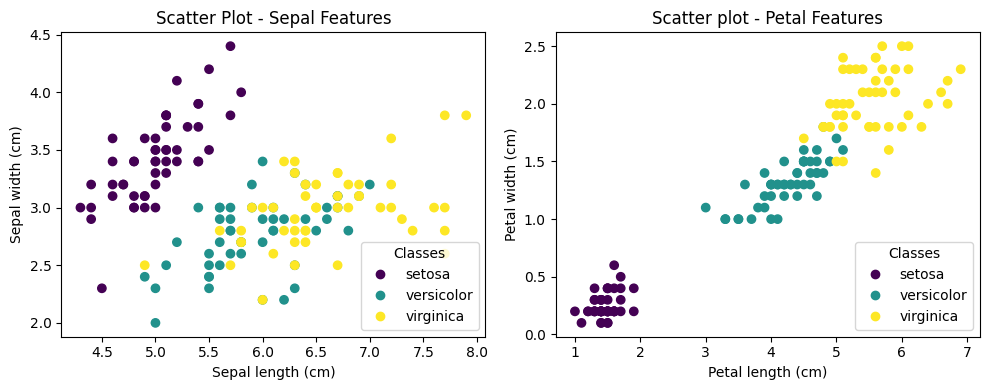

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Scatter plot for Sepal features
scatter_sepal = axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df.target)
axes[0].set_title('Scatter Plot - Sepal Features')
axes[0].set_xlabel('Sepal length (cm)')
axes[0].set_ylabel('Sepal width (cm)')

# Scatter plot for Petal features
scatter_petal = axes[1].scatter(df['petal length (cm)'], df['petal width (cm)'], c=df.target)
axes[1].set_title('Scatter plot - Petal Features')
axes[1].set_xlabel('Petal length (cm)')
axes[1].set_ylabel('Petal width (cm)')

# Add legend
legend_labels = scatter_sepal.legend_elements()[0]
axes[0].legend(legend_labels, iris.target_names, loc="lower right", title="Classes")
axes[1].legend(legend_labels, iris.target_names, loc="lower right", title="Classes")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Each point in the above-shown scatter plot corresponds to one of the 150 iris flowers in the dataset, with the color indicating their respective types (Setosa, Versicolour, and Virginica). A clear pattern is already noticeable for the Setosa type, easily distinguishable by its short length and wide sepal in the left plot. However, when considering sepal width and length, it becomes challenging to segregate between Versicolor and Virginica flowers.

On the other hand, the scatter plot of petal features represents a clear segregation between all three types of flowers based on their petal length and width. However, when considering the sepal width and length, it is hard to segregate between Versicolor and Virginica flowers.


### Class Distribution Analysis:

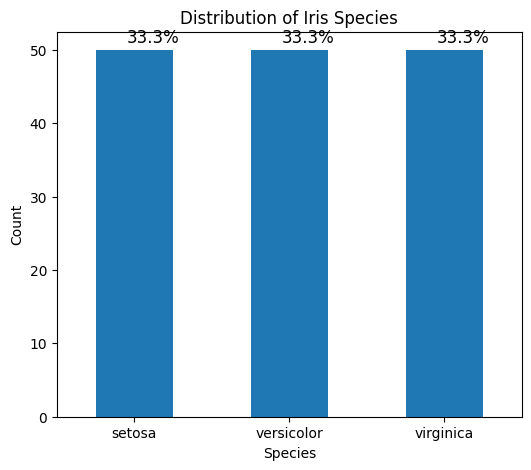

In [35]:
plt.figure(figsize=(6, 5))
ax = df.species.value_counts().plot(kind='bar')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), fontsize=12)

plt.xticks(rotation=0)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Iris Species')
plt.show()

The Iris dataset demonstrates a balanced distribution across its three classes (setosa,versicolor, and virginica). Each class represents approximately one-third of the dataset. This balance is advantageous, promoting fair model training and evaluation across all classes.

### Classification model
Here we will use and compare thress different classification models $k$- nearest neighbours ($k$-nn), logistic regression (LR), and support vector machines (SVM).

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-2], df.target,test_size=0.2, random_state=42)

# Create and fit knn classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Create and fit SVM classifier
svc_clf = SVC(kernel='rbf', C=1.0)
svc_clf.fit(X_train, y_train)

# Create and fit Logistic Regression classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [57]:
knn_preds = knn_clf.predict(X_test)
svc_preds = svc_clf.predict(X_test)
lr_preds = lr_clf.predict(X_test)

### Performance Evaluation